In [ ]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop

import tensorflow as tf

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
!unzip "/content/archive.zip" -d Test

Archive:  /content/archive.zip
replace Test/covid19.model? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Test/covid19.model      
  inflating: Test/dataset/covid/covid (1).jpeg  
  inflating: Test/dataset/covid/covid (1).jpg  
  inflating: Test/dataset/covid/covid (1).png  
  inflating: Test/dataset/covid/covid (10).jpeg  
  inflating: Test/dataset/covid/covid (10).jpg  
  inflating: Test/dataset/covid/covid (10).png  
  inflating: Test/dataset/covid/covid (11).jpeg  
  inflating: Test/dataset/covid/covid (11).jpg  
  inflating: Test/dataset/covid/covid (11).png  
  inflating: Test/dataset/covid/covid (12).jpeg  
  inflating: Test/dataset/covid/covid (12).jpg  
  inflating: Test/dataset/covid/covid (13).jpeg  
  inflating: Test/dataset/covid/covid (13).jpg  
  inflating: Test/dataset/covid/covid (14).jpeg  
  inflating: Test/dataset/covid/covid (14).jpg  
  inflating: Test/dataset/covid/covid (15).jpeg  
  inflating: Test/dataset/covid/covid (15).jpg  
  inflating: Test/dataset/

In [ ]:

DATASET_DIR = "../content/Test/dataset"



In [ ]:
os.listdir(DATASET_DIR)

['covid', 'normal']

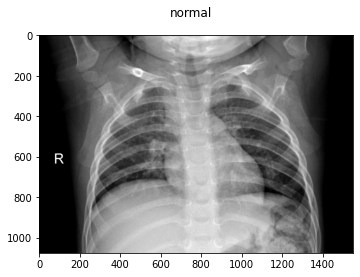

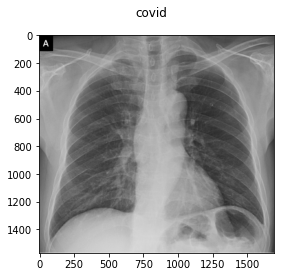

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

normal_images = []
for img_path in glob.glob(DATASET_DIR + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('normal')
plt.imshow(normal_images[0], cmap='gray') 

covid_images = []
for img_path in glob.glob(DATASET_DIR + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))

fig = plt.figure()
fig.suptitle('covid')
plt.imshow(covid_images[0], cmap='gray')

In [ ]:
print(len(normal_images))
print(len(covid_images))

28
70


In [ ]:
IMG_W = 150
IMG_H = 150
CHANNELS = 3

INPUT_SHAPE = (IMG_W, IMG_H, CHANNELS)
NB_CLASSES = 2
EPOCHS = 48
BATCH_SIZE = 6

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(250,(3,3)))
model.add(Activation("relu"))
  
model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2)))
model.add(Activation("relu"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid"))

In [ ]:


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])



In [ ]:


model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [ ]:


train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

train_generator = train_datagen.flow_from_directory(
    DATASET_DIR,
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    DATASET_DIR, 
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle= False,
    subset='validation')

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // BATCH_SIZE,
    epochs = EPOCHS)



Found 69 images belonging to 2 classes.
Found 29 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
11/11 [==============================] - 9s 687ms/step - loss: 0.7933 - accuracy: 0.4515 - val_loss: 0.5840 - val_accuracy: 0.8750
Epoch 2/48
11/11 [==============================] - 7s 644ms/step - loss: 0.6562 - accuracy: 0.6258 - val_loss: 0.5326 - val_accuracy: 0.8750
Epoch 3/48
11/11 [==============================] - 7s 635ms/step - loss: 0.6619 - accuracy: 0.6720 - val_loss: 0.5485 - val_accuracy: 0.8750
Epoch 4/48
11/11 [==============================] - 7s 617ms/step - loss: 0.6630 - accuracy: 0.6790 - val_loss: 0.4315 - val_accuracy: 0.8750
Epoch 5/48
11/11 [==============================] - 7s 614ms/step - loss: 0.5806 - accuracy: 0.7577 - val_loss: 0.5900 - val_accuracy: 0.8750
Epoch 6/48
11/11 [==============================] - 7s 645ms/step - loss: 0.6326 - accuracy: 0.7379 - val_loss: 0.5932 - val_accuracy: 0.8750
Epoch 7/48
11/11 [==============================] - 7s 633ms/step - loss: 0.6326 - accuracy: 0.6863 - val_loss: 0.5266 - val_accuracy: 0.8750
Epoch 

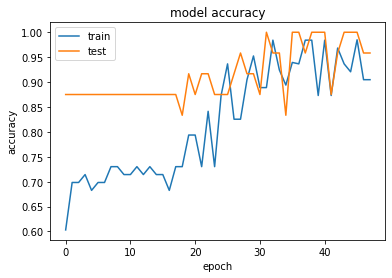

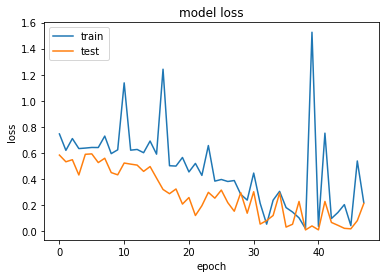

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9047619104385376
validation_accuracy 0.9583333134651184


In [24]:
label = validation_generator.classes

In [25]:
pred= model.predict(validation_generator)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

In [26]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(predicted_class_indices,label)
cf

array([[21,  8],
       [ 0,  0]])

In [27]:


exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)



Predicted,0,All
Actual,,
0,21,21
1,8,8
All,29,29


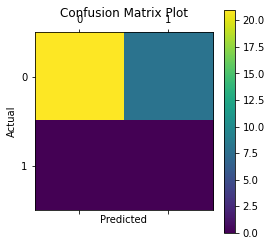

In [28]:
plt.matshow(cf)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

Epoch 1/5
200/200 [==============================] - 1s 1ms/step - loss: 0.4235 - accuracy: 0.8344
Epoch 2/5
200/200 [==============================] - 0s 1ms/step - loss: 0.1909 - accuracy: 0.9333
Epoch 3/5
200/200 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9390
Epoch 4/5
200/200 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9391
Epoch 5/5
200/200 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9373


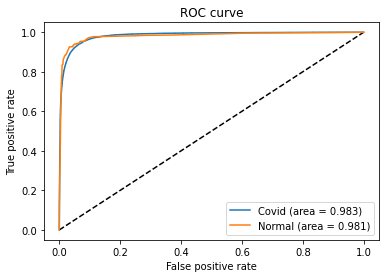

In [29]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=80000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Covid (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='Normal (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()